## Final Project Submission

Student name: Meagan Rossi <br />
Student pace: FT <br />
Scheduled project review date/time: Monday, March 9th @ 2:30pm <br />
Instructor name: SeanAbu Wilson <br />
Blog post URL: N/A<br />


In [3]:
def solve(arr):
    arr = 0
    t=input_time.split(':')
    total_minutes= int(t[0])*60+int(t[1])*1 +int(t[2])/60

In [5]:
print(solve(["14:51"]), "23:59")

NameError: name 'input_time' is not defined

In [2]:
import pyspark 
sc = pyspark.SparkContext('local[*]')
# do something to prove it works
rdd = sc.parallelize(range(1000))
rdd.takeSample(False, 5)

Exception: Java gateway process exited before sending its port number

In [1]:
# import libraries
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, make_scorer
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier

from xgboost import XGBClassifier
import xgboost as xgb

In [2]:
# Import the dataset from Kaggle, located here: https://www.kaggle.com/patelprashant/employee-attrition

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Learn more about the data types and identify potential null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 26 Text xticklabel objects>)

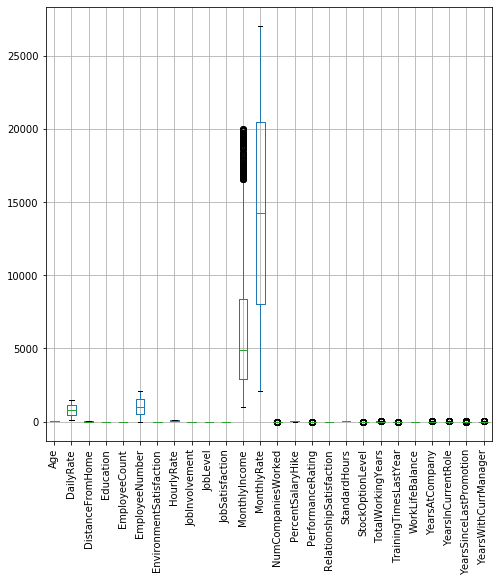

In [6]:
pd.DataFrame.boxplot(df,figsize=(8,8))
plt.xticks(rotation=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c18a65978>,
      dtype=object)

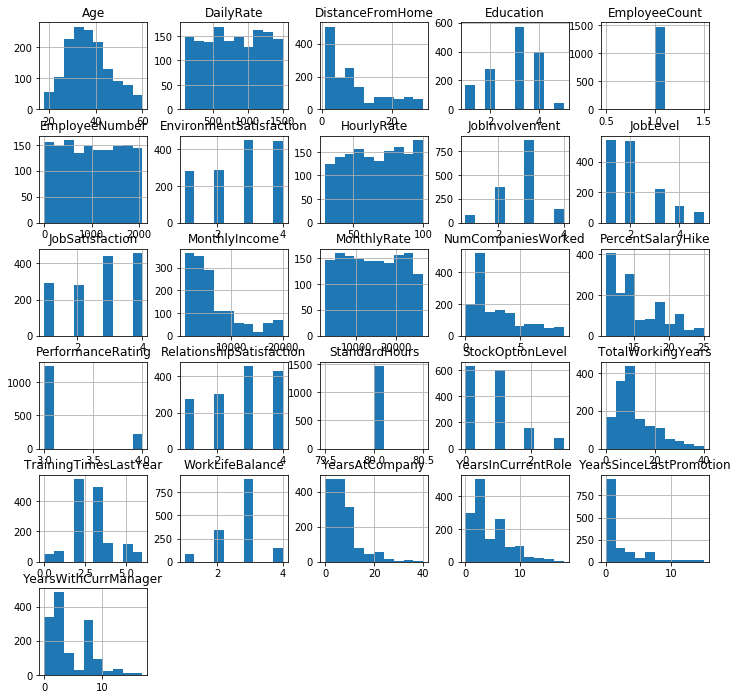

In [7]:
pd.DataFrame.hist(df,figsize=(12,12))

In [53]:
sns.regplot(x=df['MonthlyIncome'], y=df['MonthlyRate'],line_kws={"color":"r","alpha":0.7,"lw":5}).set_title('MonthlyIncome+MonthlyRate')

KeyError: 'MonthlyRate'

Text(0.5, 1.0, 'No Attrition')

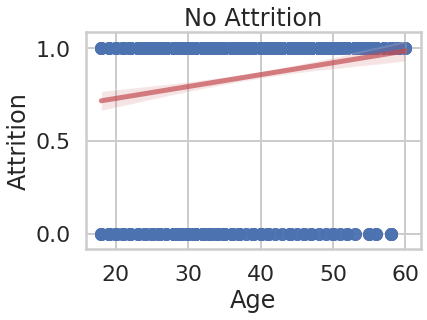

In [59]:
sns.regplot(x=df['Age'], y=(df['Attrition']==0),line_kws={"color":"r","alpha":0.7,"lw":5}).set_title('No Attrition')

Text(0.5, 1.0, 'Age+Attrition')

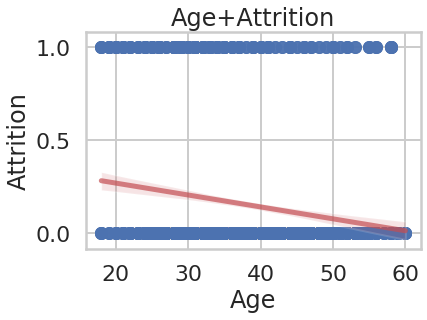

In [57]:
sns.regplot(x=df['Age'], y=df['Attrition']==1,line_kws={"color":"r","alpha":0.7,"lw":5}).set_title('Age+Attrition')

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
#Remove highly correlated variables

df.drop(columns = [\
# All relating to pay rate
'DailyRate','HourlyRate','MonthlyRate',\

# All highly related to age
'Over18','YearsAtCompany','YearsInCurrentRole',\

# Irrelevant
'EmployeeCount','EmployeeNumber',\
'StandardHours','JobInvolvement','JobSatisfaction',\

# Dropped after running models and seeing a lack of correlation
'TrainingTimesLastYear', 'EducationField','PerformanceRating',\
'DistanceFromHome','EnvironmentSatisfaction','EducationField',\
'RelationshipSatisfaction','Department'\

], inplace = True)

In [11]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Education', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
# Convert Attrition to a categorical variable
cat = {'Yes':1, 'No':0}
df['Attrition'] = df["Attrition"].apply(lambda x: cat[x])

In [13]:
#Convert categorical variables into dummy variables
travel_dummies = pd.get_dummies(df['BusinessTravel'], prefix='travel')
gender_dummies = pd.get_dummies(df['Gender'], prefix='gender')
role_dummies = pd.get_dummies(df['JobRole'], prefix='role')
marriage_dummies = pd.get_dummies(df['MaritalStatus'], prefix='marriage')
OT_dummies = pd.get_dummies(df['OverTime'], prefix='OT')
education_dummies = pd.get_dummies(df['Education'], prefix='education')
worklife_dummies = pd.get_dummies(df['WorkLifeBalance'], prefix='worklife')

# Concat the dummy variables
df = pd.concat([df,travel_dummies, gender_dummies,\
role_dummies, marriage_dummies,OT_dummies,education_dummies,worklife_dummies,\
], axis=1)
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'Education', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'travel_Non-Travel', 'travel_Travel_Frequently',
       'travel_Travel_Rarely', 'gender_Female', 'gender_Male',
       'role_Healthcare Representative', 'role_Human Resources',
       'role_Laboratory Technician', 'role_Manager',
       'role_Manufacturing Director', 'role_Research Director',
       'role_Research Scientist', 'role_Sales Executive',
       'role_Sales Representative', 'marriage_Divorced', 'marriage_Married',
       'marriage_Single', 'OT_No', 'OT_Yes', 'education_1', 'education_2',
       'education_3', 'education_4', 'education_5', 'worklife_1', 'worklife_2',
       'worklife_3', 'worklife_4'],
      dtype='object')

In [14]:
# Drop variables converted to dummies
df.drop(columns = [\
'BusinessTravel','Gender','JobRole','MaritalStatus','OverTime',\
'Education','WorkLifeBalance'
], inplace = True)

In [15]:
df['CurrManagerPromotion']=((df['YearsWithCurrManager'])-(df['YearsSinceLastPromotion']))

In [16]:
df.CurrManagerPromotion = np.where(df.CurrManagerPromotion < 1 , 0, df.CurrManagerPromotion)
df.CurrManagerPromotion = np.where(df.CurrManagerPromotion >=1 , 1, df.CurrManagerPromotion)

In [17]:
df.columns

Index(['Age', 'Attrition', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'travel_Non-Travel',
       'travel_Travel_Frequently', 'travel_Travel_Rarely', 'gender_Female',
       'gender_Male', 'role_Healthcare Representative', 'role_Human Resources',
       'role_Laboratory Technician', 'role_Manager',
       'role_Manufacturing Director', 'role_Research Director',
       'role_Research Scientist', 'role_Sales Executive',
       'role_Sales Representative', 'marriage_Divorced', 'marriage_Married',
       'marriage_Single', 'OT_No', 'OT_Yes', 'education_1', 'education_2',
       'education_3', 'education_4', 'education_5', 'worklife_1', 'worklife_2',
       'worklife_3', 'worklife_4', 'CurrManagerPromotion'],
      dtype='object')

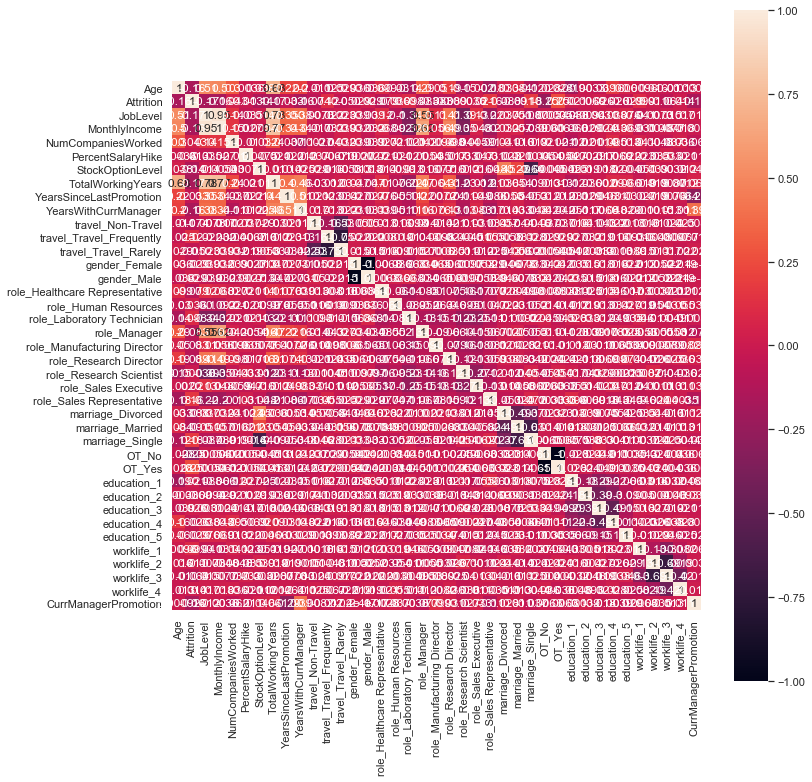

In [18]:
corrmat = df[['Age', 'Attrition', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'travel_Non-Travel',
       'travel_Travel_Frequently', 'travel_Travel_Rarely', 'gender_Female',
       'gender_Male', 'role_Healthcare Representative', 'role_Human Resources',
       'role_Laboratory Technician', 'role_Manager',
       'role_Manufacturing Director', 'role_Research Director',
       'role_Research Scientist', 'role_Sales Executive',
       'role_Sales Representative', 'marriage_Divorced', 'marriage_Married',
       'marriage_Single', 'OT_No', 'OT_Yes', 'education_1', 'education_2',
       'education_3', 'education_4', 'education_5', 'worklife_1', 'worklife_2',
       'worklife_3', 'worklife_4', 'CurrManagerPromotion']].corr()

sns.set(font_scale=1)
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
plt.tight_layout()
sns.heatmap(corrmat,square=True,annot=True, cbar = True)

### Feature Selection

In [19]:
df.columns

Index(['Age', 'Attrition', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'travel_Non-Travel',
       'travel_Travel_Frequently', 'travel_Travel_Rarely', 'gender_Female',
       'gender_Male', 'role_Healthcare Representative', 'role_Human Resources',
       'role_Laboratory Technician', 'role_Manager',
       'role_Manufacturing Director', 'role_Research Director',
       'role_Research Scientist', 'role_Sales Executive',
       'role_Sales Representative', 'marriage_Divorced', 'marriage_Married',
       'marriage_Single', 'OT_No', 'OT_Yes', 'education_1', 'education_2',
       'education_3', 'education_4', 'education_5', 'worklife_1', 'worklife_2',
       'worklife_3', 'worklife_4', 'CurrManagerPromotion'],
      dtype='object')

In [20]:
features = df[['Age', 'Attrition', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'travel_Non-Travel',
       'travel_Travel_Frequently', 'travel_Travel_Rarely', 'gender_Female',
       'gender_Male', 'role_Healthcare Representative', 'role_Human Resources',
       'role_Laboratory Technician', 'role_Manager',
       'role_Manufacturing Director', 'role_Research Director',
       'role_Research Scientist', 'role_Sales Executive',
       'role_Sales Representative', 'marriage_Divorced', 'marriage_Married',
       'marriage_Single', 'OT_No', 'OT_Yes', 'education_1', 'education_2',
       'education_3', 'education_4', 'education_5', 'worklife_1', 'worklife_2',
       'worklife_3', 'worklife_4', 'CurrManagerPromotion']]

### Model Fitting and Hyperparameter Tuning

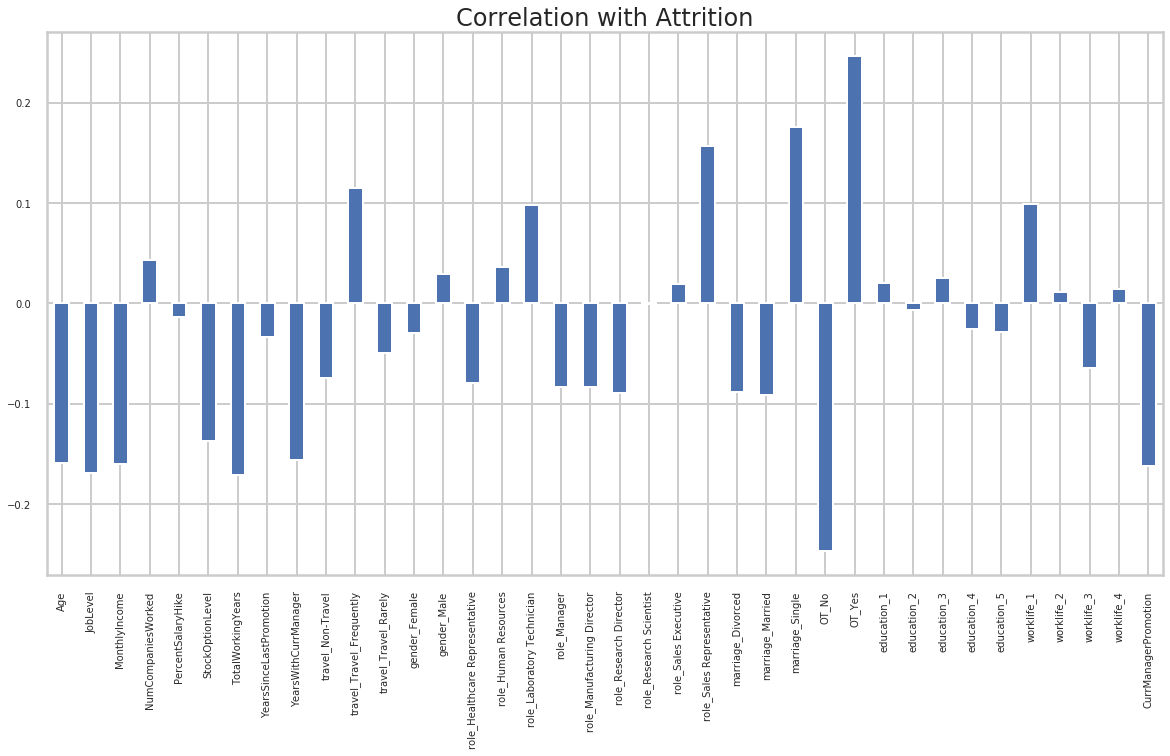

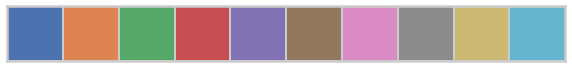

In [47]:
X = df.drop(['Attrition'],axis=1)
y = df['Attrition']

sns.set(style="whitegrid", palette=("deep"),font='calibri')
sns.set_context("poster")

X.corrwith(df['Attrition']).plot.bar(figsize = (20, 10), title ="Correlation with Attrition", fontsize = 10,
rot = 90, grid = True,)

sns.palplot(sns.color_palette())

In [22]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### KNN

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [39]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [41]:
# calculate accuracy

y_pred_class = knn.predict(X_test)

print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1:' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.7934782608695652
F1:0.33333333333333337


### Random Forest

In [49]:
target = df['Attrition']
features = df.drop('Attrition', axis = 1)
#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=10)
#Create the model and train
model = RandomForestClassifier()
model.fit(X_train,y_train)
#predict the results for test
test_pred = model.predict(X_test)
#test the accuracy

print("Accuracy: %f" % (accuracy_score(y_test, test_pred)))
print("F1: %f" % (f1_score(y_test, test_pred)))

Accuracy: 0.843537
F1: 0.530612


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


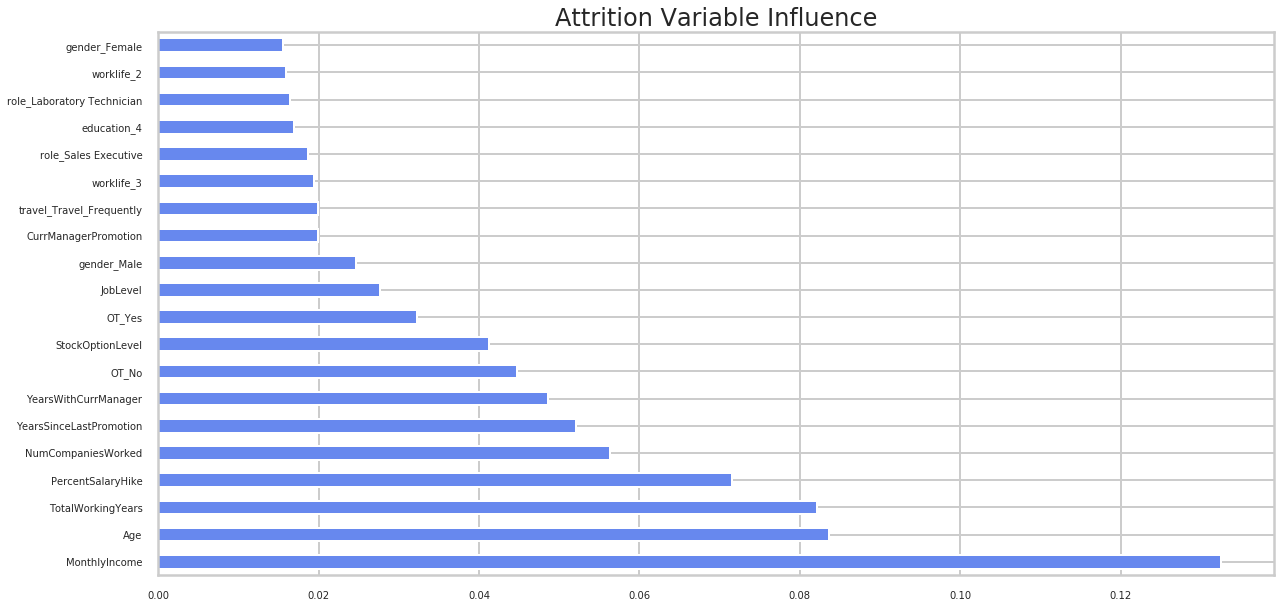

In [28]:
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh',fontsize=10,figsize=(20, 10),title ="Attrition Variable Influence")

### Model: XGBoost

In [29]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [30]:
X = df.drop('Attrition', axis = 1)
y = df['Attrition']
feature_cols = X.columns

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

In [32]:
training = pd.concat([X_train,y_train], axis =1)

In [33]:
ndefault = training[training['Attrition']==0]
default = training[training['Attrition']==1]

In [34]:
upsampled = resample(default,
                          replace=True, # sample with replacement
                          n_samples=len(ndefault), # match number in majority class
                          random_state=23) # reproducible results

upsampled = pd.concat([ndefault, upsampled])
upsampled['Attrition'].value_counts()

1    925
0    925
Name: Attrition, dtype: int64

In [35]:
X_train = upsampled.drop('Attrition', axis = 1)
y_train = upsampled['Attrition']
feature_cols = X_train.columns

In [36]:
xgb.XGBClassifier()
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.3, 
                           subsample = 0.5,
                           learning_rate = 0.1,
                           max_depth = 4, 
                           alpha = 1, 
                           n_estimators = 10000)
xg_clf.fit(X_train,y_train)
preds = xg_clf.predict(X_test)

test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.823370
F1: 0.434783
